In [1]:
import os

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score
import joblib
import pandas as pd
import numpy as np

In [3]:
"""
线性回归直接预测房子价格
:return: None
"""
# 获取数据
fe_cal = fetch_california_housing(data_home='data')

print("获取特征值")
print(fe_cal.data.shape)
print('-' * 50)
print(fe_cal.data[0])
print("目标值")
print(fe_cal.target) #单位是10万美金
# print(fe_cal.DESCR)
print('-' * 50)
print(fe_cal.feature_names) #特征列的名字

获取特征值
(20640, 8)
--------------------------------------------------
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
目标值
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
--------------------------------------------------
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


MedInc - 中位收入（Median Income）
HouseAge - 房屋年龄（House Age）
AveRooms - 平均房间数（Average Number of Rooms）
AveBedrms - 平均卧室数（Average Number of Bedrooms）
Population - 人口数量（Population）
AveOccup - 平均居住人数（Average Occupancy）
Latitude - 纬度（Latitude）
Longitude - 经度（Longitude）

In [7]:
fe_cal.target.shape

(20640,)

In [28]:
# 分割数据集到训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(fe_cal.data, fe_cal.target, test_size=0.25, random_state=1)
#
print(x_train.shape)
#
# # 进行标准化处理(?) 目标值处理？
# # 特征值和目标值是都必须进行标准化处理, 实例化两个标准化API
std_x = StandardScaler()
#
x_train = std_x.fit_transform(x_train) #训练集标准化
x_test = std_x.transform(x_test) #测试集标准化
# print(y_train.shape)
# 目标值进行了标准化，暂时没有对目标值进行标准化处理
# std_y = StandardScaler()
# #
# # #标签进行标准化
# # 目标值是一维的，这里需要传进去2维的
# y_train = std_y.fit_transform(y_train.reshape(-1, 1))
# print(y_train.shape)

(15480, 8)


In [8]:
temp = y_train.reshape(-1, 1) #-1代表把剩余的元素都堆到哪一维
print(temp.shape)

(15480, 1)


In [11]:
test1=np.array([1,2,3])
print(test1.shape)
print(test1.reshape(-1,1))

(3,)
[[1]
 [2]
 [3]]


# 未对目标值进行标准化处理的训练代码

In [20]:
import os
# # estimator预测
# # # 正规方程求解方式预测结果，正规方程进行线性回归
lr = LinearRegression()
# fit是耗时的
lr.fit(x_train, y_train)
#回归系数可以看特征与目标之间的相关性
print('回归系数', lr.coef_)
#
y_predict = lr.predict(x_test)
# 保存训练好的模型，模型中保存的是w的值，也保存了模型结构
#保存模型放在fit之后即可
os.unlink('./tmp/test.pkl') # 删除之前的模型文件
joblib.dump(lr, "./tmp/test.pkl")
print("正规方程测试集里面每个房子的预测价格：", y_predict[0:10])
#下面是求测试集的损失，用均方误差，公式是(y_test-y_predict)^2/n
print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))

回归系数 [ 0.83167028  0.12159502 -0.26758589  0.30983997 -0.00518054 -0.04040421
 -0.90736902 -0.88212727]
正规方程测试集里面每个房子的预测价格： [2.12391852 0.93825754 2.7088455  1.70873764 2.82954754 3.50376456
 3.0147162  1.62781292 1.74317518 2.01897806]
正规方程的均方误差： 0.5356532845422556


# 对目标值进行标准化处理的训练代码

In [22]:
lr = LinearRegression()
# fit是耗时的
lr.fit(x_train, y_train)
#回归系数可以看特征与目标之间的相关性
print('回归系数', lr.coef_)
#
y_predict = lr.predict(x_test)
# 保存训练好的模型，模型中保存的是w的值，也保存了模型结构
# 预测测试集的房子价格，通过inverse得到真正的房子价格
y_lr_predict = std_y.inverse_transform(y_predict)
#保存模型放在fit之后即可
os.unlink('./tmp/test.pkl') # 删除之前的模型文件
joblib.dump(lr, "./tmp/test.pkl")
print("正规方程测试集里面每个房子的预测价格：", y_lr_predict[0:10])
print("正规方程的均方误差：", mean_squared_error(y_test, y_lr_predict))

回归系数 [[ 0.71942632  0.10518431 -0.23147194  0.26802332 -0.00448136 -0.03495117
  -0.7849086  -0.76307353]]
正规方程测试集里面每个房子的预测价格： [[2.12391852]
 [0.93825754]
 [2.7088455 ]
 [1.70873764]
 [2.82954754]
 [3.50376456]
 [3.0147162 ]
 [1.62781292]
 [1.74317518]
 [2.01897806]]
正规方程的均方误差： 0.5356532845422556


# 2 加载保存的模型

In [23]:
#模拟上线时加载模型
model = joblib.load("./tmp/test.pkl")
# # 因为目标值进行了标准化，一定要把预测后的值逆向转换回来
y_predict = model.predict(x_test)

#
# print("保存的模型预测的结果：", y_predict[0:10])
# print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))
print("保存的y标准化后的模型预测的结果：", std_y.inverse_transform(y_predict)[0:10])
print("正规方程inverse后的均方误差：", mean_squared_error(y_test,
                                               std_y.inverse_transform(y_predict)))

保存的模型预测的结果： [[2.12391852]
 [0.93825754]
 [2.7088455 ]
 [1.70873764]
 [2.82954754]
 [3.50376456]
 [3.0147162 ]
 [1.62781292]
 [1.74317518]
 [2.01897806]]
正规方程inverse后的均方误差： 0.5356532845422556


In [24]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [25]:
#人工求均方误差
(np.square(3 - 2.5) + np.square(0.5) + 1) / 4


0.375

In [26]:
y=3*np.square(-1/3)+2*(-1/3)+1
y

0.6666666666666667

# 3 线性回归之梯度下降去进行房价预测

In [29]:
# 梯度下降去进行房价预测,数据量大要用这个
# learning_rate的不同方式，代表学习率变化的算法不一样,比如constant,invscaling,adaptive
# 默认可以去调 eta0 = 0.008，会改变learning_rate的初始值
# learning_rate='optimal',alpha是正则化力度，但是会影响学习率的值，由alpha来算学习率
# penalty代表正则化，分为l1和l2
# eta0=0.01, penalty='l2',max_iter=1000
sgd = SGDRegressor(eta0=0.01,penalty='l2', max_iter=1000)
# # 训练
sgd.fit(x_train, y_train)
#
print('梯度下降的回归系数', sgd.coef_)
#
# 预测测试集的房子价格
# y_sgd_predict = std_y.inverse_transform(sgd.predict(x_test).reshape(-1, 1))
y_predict = sgd.predict(x_test)
# print("梯度下降测试集里面每个房子的预测价格：", y_sgd_predict)
print("梯度下降的均方误差：", mean_squared_error(y_test, y_predict))
# print("梯度下降的原始房价量纲均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_sgd_predict))

梯度下降的回归系数 [ 0.81803885  0.12633362 -0.23485282  0.35394739 -0.00291484 -0.01617019
 -0.9218979  -0.88947926]
梯度下降的均方误差： 0.5375925120368399


In [34]:
w=1
learning_rate=0.1  #这里是学习率，可以调节
def loss(w):
    return 3*w**2+2*w+2
def dao_shu(w):
    return 6*w+2
for i in range(30):
    w=w-learning_rate*dao_shu(w)
    print(f'w {w} 损失{loss(w)}')

w 0.19999999999999996 损失2.5199999999999996
w -0.12000000000000005 损失1.8032
w -0.24800000000000003 损失1.688512
w -0.2992 损失1.67016192
w -0.31968 损失1.6672259072
w -0.327872 损失1.666756145152
w -0.33114879999999997 损失1.6666809832243201
w -0.33245952 损失1.6666689573158913
w -0.332983808 损失1.6666670331705427
w -0.3331935232 损失1.6666667253072869
w -0.33327740928 损失1.666666676049166
w -0.333310963712 损失1.6666666681678666
w -0.3333243854848 损失1.6666666669068586
w -0.33332975419392 损失1.6666666667050973
w -0.333331901677568 损失1.6666666666728156
w -0.3333327606710272 损失1.6666666666676506
w -0.3333331042684109 损失1.6666666666668242
w -0.33333324170736434 损失1.6666666666666918
w -0.33333329668294576 损失1.6666666666666707
w -0.3333333186731783 损失1.6666666666666674
w -0.3333333274692713 损失1.6666666666666667
w -0.3333333309877085 损失1.6666666666666667
w -0.3333333323950834 损失1.6666666666666665
w -0.33333333295803336 损失1.6666666666666667
w -0.33333333318321334 损失1.6666666666666667
w -0.33333333327328535 损失1.6

# 4 岭回归

In [35]:
# # # 岭回归去进行房价预测
#岭回归是对线性回归加入L2正则化，L2正则化是对系数的平方和进行惩罚
#alpha就是补偿的系数
#正规方程求解，加补偿就可以让正规方程可逆
rd = Ridge(alpha=0.02)

rd.fit(x_train, y_train)

print(rd.coef_)
#
# # 预测测试集的房子价格
print(rd.predict(x_test).shape)
# y_rd_predict = std_y.inverse_transform(rd.predict(x_test))
y_predict = rd.predict(x_test)
# print("岭回归里面每个房子的预测价格：", y_rd_predict)

print("岭回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("岭回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_rd_predict))

[ 0.83166963  0.12159681 -0.26758236  0.30983534 -0.00517992 -0.04040432
 -0.90735215 -0.88211025]
(5160,)
岭回归的均方误差： 0.5356531179270397


# 5 lasso回归

In [36]:
# # # Lasso回归去进行房价预测
#alpha就是补偿的系数
print(x_train.shape)
print(y_train.shape)
ls = Lasso(alpha=0.001)

ls.fit(x_train, y_train)

print(ls.coef_)
#
# # 预测测试集的房子价格
print(ls.predict(x_test).shape)
print('-'*50)
# y_ls_predict = std_y.inverse_transform(ls.predict(x_test).reshape(-1,1))
y_predict = ls.predict(x_test)
# print("Lasso回归里面每个房子的预测价格：", y_rd_predict)
#
print("Lasso回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("Lasso回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_ls_predict))

(15480, 8)
(15480,)
[ 0.82655827  0.1225482  -0.25369194  0.29596304 -0.00381001 -0.03948424
 -0.89646842 -0.87060253]
(5160,)
--------------------------------------------------
Lasso回归的均方误差： 0.5356324125105497


# 5 逻辑回归

In [38]:
np.log(0.8)

-0.2231435513142097

In [39]:
np.log(0.1)

-2.3025850929940455

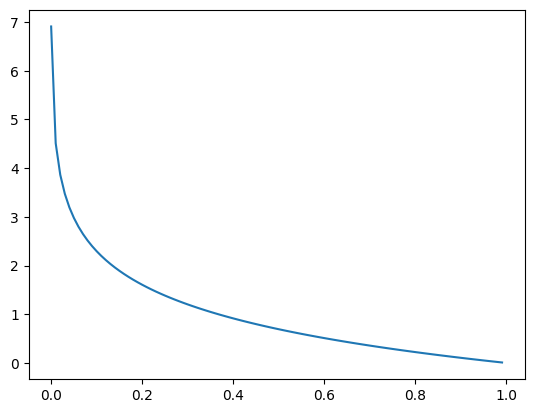

In [41]:
x=np.arange(0.001,1,0.01) #0-1之间，步长0.01
import matplotlib.pyplot as plt
plt.plot(x,-np.log(x))  #以e为底部
plt.show()

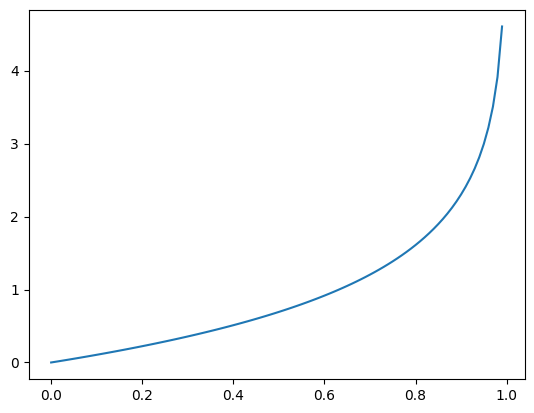

In [40]:
x=np.arange(0,1,0.01)
import matplotlib.pyplot as plt
plt.plot(x,-np.log(1-x))
plt.show()

In [43]:
"""
逻辑回归做二分类进行癌症预测（根据细胞的属性特征）
:return: NOne
"""
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 读取数据
# data = pd.read_csv(
#     "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#     names=column)
data = pd.read_csv(
    "./data/breast-cancer-wisconsin.csv",
    names=column)
# print(data) #想看可以解除
#当你读取数据时，看上去是数值的列，读进来是字符串，说明里边
# 存在了非数值情况
print(data.info())
print('-'*50)
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
--------------------------------------------------


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [44]:
data['Bare Nuclei'].unique() #因为上面发现它是object类型

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [45]:
# 缺失值进行处理
data = data.replace(to_replace='?', value=np.nan)
#直接删除，哪一行有空值，就删除对应的样本
data = data.dropna()
print('-' * 50)
print(data.shape)

--------------------------------------------------
(683, 11)


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [48]:
column[10]

'Class'

In [47]:
#分类的类别是2和4,对应 "良性", "恶性"
data[column[10]].unique()

array([2, 4], dtype=int64)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [7]:
column[6]

'Bare Nuclei'

In [49]:
#把第6列的字符串转化为数字类型
data[column[6]] = data[column[6]].astype('int16')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int16
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int16(1), int64(10)
memory usage: 60.0 KB


In [51]:
# 进行数据的分割,第零列是编号，不可以作为特征，把第1-9列作为特征，第10列作为标签
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]], data[column[10]], test_size=0.25,
                                                    random_state=1)

# 进行标准化处理
std = StandardScaler()

x_train = std.fit_transform(x_train) #训练集标准化
x_test = std.transform(x_test) #测试集标准化
x_train[0]

array([-1.21629973, -0.70863282, -0.75174943,  0.04301674, -0.55657068,
       -0.71054972, -0.99312055, -0.62911518, -0.36280962])

In [52]:
#
# # 逻辑回归预测
# C正则化力度,跟学习率有关
# solver = 'liblinear'  solver是学习率优化算法，就是学习率会随着epoch的变化而变化
#epoch就代表第几次迭代
#max_iter 最大迭代次数
lg = LogisticRegression(C=0.5, solver='lbfgs')
#
lg.fit(x_train, y_train)
# 逻辑回归的权重参数，了解，没那么重要
print(lg.coef_)

y_predict = lg.predict(x_test)
# print(y_predict) #预测的标签
print("准确率：", lg.score(x_test, y_test))
print(y_test[0:5])
print('-'*50)
print(lg.predict_proba(x_test)[0:5])  #得出对应分类的概率


[[1.11400191 0.25293086 0.78938469 0.60986034 0.0728013  1.10834397
  0.7794668  0.64312128 0.67692658]]
准确率： 0.9824561403508771
444    2
24     2
195    2
49     4
375    2
Name: Class, dtype: int64
--------------------------------------------------
[[0.94893919 0.05106081]
 [0.99494175 0.00505825]
 [0.98365149 0.01634851]
 [0.02707911 0.97292089]
 [0.99732446 0.00267554]]


In [53]:
# 为什么还要看下召回率，labels和target_names对应
# macro avg 平均值  weighted avg 加权平均值
print(classification_report(y_test, y_predict, labels=[2, 4], target_names=["良性", "恶性"]))
#AUC计算要求是二分类，不需要是0和1
print("AUC指标：", roc_auc_score(y_test, y_predict))

              precision    recall  f1-score   support

          良性       0.97      1.00      0.99       111
          恶性       1.00      0.95      0.97        60

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC指标： 0.975


In [21]:
print(x_train.shape)
print(x_test.shape)

(512, 9)
(171, 9)


In [29]:
print(-np.log(0.1))

2.3025850929940455


In [31]:
-np.log(0.9)



0.10536051565782628

In [13]:
x=-3/10
y=5*x**2+3*x+4
y

3.55